## Лабораторная работа №2


Ступак Дмитрий
Б03-207

#### Постановка задачи

Провести  вычисления  предложенным  методом  с  заданной  точностью,  либо  с заданным шагом интегрирования

### Вариант 17

Найти численное решение задачи:

$$
(xy - x^2) y' + y^2 - 3xy - 2x^2 = 0,\quad x \in (1, 2)
$$

$$
y(1) = 1 + \sqrt{2},\quad \varepsilon = 0.0001
$$

Использовать метод Рунге-Кутты 4-го порядка точности.




Представить: 
- постановку задачи;
- теоретическое описание метода, расчетные формулы;
- таблицу расчетных данных;  
- сравнение полученного решения с точным решением (если оно известно);
- графики (полученное решение + точное решение на одном графике);
- апостериорную (по расчетным данным, полученным с разными шагами интегрирования) оценку погрешности найденного решения;
- выводы;
- код (Приложение).

Реальное решение дифференциального уравнения, с учетом начальных условий

$$
y(x) = x (1 + \sqrt{2})
$$

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def f(x, y):
    return (2 * x ** 2 + 3 * x * y - y ** 2) / (x * y - x ** 2)

def f_true(x):
    return x * (1 + np.sqrt(2))

## Теоретическое описание метода и расчетные формулы

### Метод Рунге-Кутты 4-го порядка

Метод Рунге-Кутты 4-го порядка — один из численных методов для решения обыкновенных дифференциальных уравнений первого порядка:

$$
y' = f(x, y), \quad y(x_0) = y_0
$$

Метод позволяет получить приближённое значение решения $y$ в точке $x_{n+1} = x_n + h$, используя информацию о значении функции $f(x, y)$ в четырёх точках внутри интервала $[x_n, x_{n+1}]$.

Пусть $h$ — шаг по $x$. Тогда значения $y_{n+1}$ вычисляется по формулам:

$$
\begin{aligned}
k_1 &= h f(x_n, y_n) \\\\
k_2 &= h f\left(x_n + \frac{h}{2},\ y_n + \frac{k_1}{2}\right) \\\\
k_3 &= h f\left(x_n + \frac{h}{2},\ y_n + \frac{k_2}{2}\right) \\\\
k_4 &= h f(x_n + h,\ y_n + k_3) \\\\
y_{n+1} &= y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{aligned}
$$

In [4]:
def rk4(f, x0, y0, x_end, h):
    xs = [x0]
    ys = [y0]
    x = x0
    y = y0
    while x < x_end:
        if x + h > x_end:
            h = x_end - x
        k1 = h * f(x, y)
        k2 = h * f(x + h / 2, y + k1 / 2)
        k3 = h * f(x + h / 2, y + k2 / 2)
        k4 = h * f(x + h, y + k3)
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        x += h
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [5]:
def estimate_error(y_h, y_h2):
    y_h2_2 = y_h2[::2]  
    error = np.max(np.abs(y_h - y_h2_2))  
    return error / 15

In [6]:
x0, x_end = 1, 2
y0 = 1 + np.sqrt(2)
h = 0.5
eps = 0.0001
error_table = []

In [7]:
while True:
    x_h, y_h = rk4(f, x0, y0, x_end, h)
    x_h2, y_h2 = rk4(f, x0, y0, x_end, h/2)

    error = estimate_error(y_h, y_h2)
    error_table.append((h, error))

    if error < eps:
        break
    else:
        h /= 2

In [8]:
for h_val, err in error_table:
    print(f'h = {h_val},  Погрешность  = {err}')

h = 0.5,  Погрешность  = 5.921189464667501e-17


In [9]:
print("Численное решение с h =", h)
print("y =", y_h)

Численное решение с h = 0.5
y = [2.41421356 3.62132034 4.82842712]


In [10]:
y_true = f_true(x_h)
y_true[0] = 1 + np.sqrt(2)
print("Аналитическое решение с h =", h)
print("y =", y_true)

Аналитическое решение с h = 0.5
y = [2.41421356 3.62132034 4.82842712]


In [11]:
print("Погрешность между численным и аналитическим методами")
print("e =", np.max(np.abs(y_h - y_true)))

Погрешность между численным и аналитическим методами
e = 4.440892098500626e-16


In [12]:
x_h_05, y_h_05 = rk4(f, x0, y0, x_end, 0.5)
x_h_02, y_h_02 = rk4(f, x0, y0, x_end, 0.2)
x_h_005, y_h_005 = rk4(f, x0, y0, x_end, 0.05)

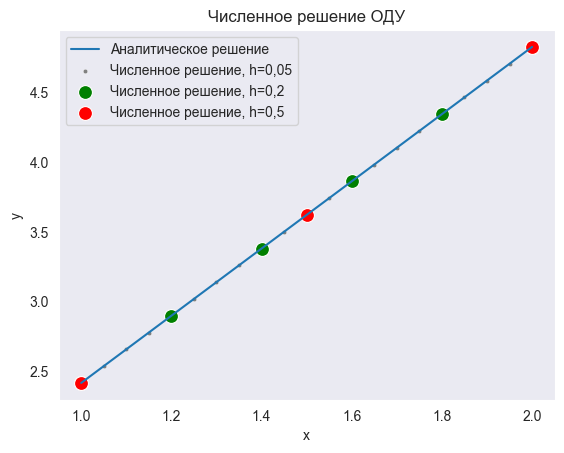

In [14]:
x = np.linspace(1, 2, 100)
y = f_true(x)
y[0] = 1 + np.sqrt(2)

sns.lineplot(x=x, y=y, label="Аналитическое решение")
sns.scatterplot(x=x_h_005, y=y_h_005, label="Численное решение, h=0,05", color="grey", s=10)
sns.scatterplot(x=x_h_02, y=y_h_02, label="Численное решение, h=0,2", color="green", s=100)
sns.scatterplot(x=x_h_05, y=y_h_05, label="Численное решение, h=0,5", color="red", s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Численное решение ОДУ')
plt.legend()
plt.grid()
plt.show()

## Вывод

При использовании метода Рунге-Кутты 4-го порядка для решения заданного дифференциального уравнения погрешность вычислений оказалась почти нулевая, что говорит о точности данного метода и подтверждает эффективность и надёжность метода Рунге-Кутты для данной задачи.

Таким образом, поставленная задача решена корректно, а полученное решение можно считать достоверным в пределах заданной точности.